## MScFE 660 Case Studies in Risk Management (C19-S3)
### October 25, 2020
### Collaborative Review Task M4
<hr>

#### Questions:

1.Visually analyze the covariance between various factors and identify the variance explained in principle components of these <br>  factors. 
Next, consider the ACF and PACF of the process and its square.

2.Using PCA provide a 2-dimensional representation of the weight-space of a set of linear models representing the covariance <br> between our factors and the different benchmark portfolios. Comment on the distribution of the benchmark portfolios across the <br>  weight-space.

3.Using linear regression test for the significance of these factors, as per the original work of Fama and French, under the <br>  equation:

    ExpectedReturns = rf + β1(rm−rf) + β2SMB + β3HML + β4RMW + β5CMA
  
 <hr>


The five-factor asset pricing model is an extension of the Fama and French three-factor asset pricing model that include <br> profitability and investment factors:

    ExpectedReturns = rf + β1(rm−rf) + β2SMB + β3HML + β4RMW + β5CMA

Where rf   = riskfree return

    rm = return on value-weight market portfolio
  
    SMB = return on portfolio of small stocks minus portfolio of big stocks
  
    HML = return on portfolio of high minus low B/M stocks
    
    RMW = return on portfolio of robust minus weak profitability stocks
    
    CMA = return on portfolio of low minus high investment firms
  
  
<hr>


In [280]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model

from printdescribe import print2, describe2


from functools import reduce
from operator import mul

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox


import holoviews as hv
import hvplot
import hvplot.pandas


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
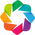

In [281]:
np.random.seed(42)
hv.extension('bokeh')

In [283]:
%opts Curve[width=900 height=400] NdOverlay [legend_position='right']

In [18]:
# Download datasets
portfolios100 = web.DataReader('100_Portfolios_10x10_Daily', 'famafrench')
factors5 = web.DataReader('F-F_Research_Data_5_Factors_2x3_Daily', 'famafrench')

In [19]:
portfolios100['DESCR']

'100 Portfolios 10x10 Daily\n--------------------------\n\nThis file was created by CMPT_ME_BEME_RETS_DAILY using the 202008 CRSP database. It contains value-weighted returns for the intersections of 10 ME portfolios and 10 BE/ME portfolios. The portfolios are constructed at the end of June. ME is market cap at the end of June. BE/ME is book equity at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Missing data are indicated by -99.99 or -999. The break points use Compustat firms plus the firms hand-collected from the Moodys Industrial, Transportation, Utilities, and Financials Manuals. The portfolios use Compustat firms plus the firms hand-collected from the Moodys Industrial, Transportation, Utilities, and Financials Manuals. Copyright 2020 Kenneth R. French\n\n  0 : Average Value Weighted Returns -- Daily (1220 rows x 100 cols)\n  1 : Average Equal Weighted Returns -- Daily (1220 rows x 100 cols)\n  2 : Number of Firms in P

In [20]:
factors5['DESCR']

'F-F Research Data 5 Factors 2x3 Daily\n-------------------------------------\n\nThis file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202008 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.\n\n  0 : (1220 rows x 6 cols)'

In [22]:
# select the Average Value Weighted Returns -- Daily (1220 rows x 100 cols)
portfolios100 = portfolios100[0]
factors5 = factors5[0]

In [36]:
# Checking for missing values porfolios dataset
print(portfolios100[portfolios100.iloc[:,0] >98.0].sum().sum(),
portfolios100.isnull().sum().sum())

0.0 0


In [37]:
# Checking for missing values in factors dataset
print(factors5[portfolios100.iloc[:,0] >98.0].sum().sum(),
factors5.isnull().sum().sum())

0.0 0


In [30]:
portfolios100.iloc[:, 90:100].head()

,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM
Date,,,,,,,,,,
2015-10-27,0.06,-0.27,-0.06,0.04,-0.03,-0.49,-0.62,-1.03,-0.39,-0.88
2015-10-28,0.54,1.67,0.21,0.99,1.23,0.74,2.79,1.37,3.05,4.68
2015-10-29,-0.01,0.43,-0.22,0.09,-0.53,0.16,-0.28,-0.24,-0.34,-1.21
2015-10-30,-0.13,-0.87,-0.59,-0.80,-1.07,-0.29,-0.73,-0.56,-1.30,-1.24
2015-11-02,0.93,0.78,0.85,1.12,1.50,1.54,1.61,2.09,1.68,1.39


In [33]:
portfolios100.shape

(1220, 100)

In [34]:
factors5.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2015-10-27,-0.42,-1.06,-0.93,-0.45,-0.51,0.0
2015-10-28,1.43,1.49,0.68,-0.71,-0.25,0.0
2015-10-29,-0.20,-0.89,0.08,0.43,-0.20,0.0
2015-10-30,-0.42,0.21,-0.56,0.36,0.08,0.0
2015-11-02,1.25,0.90,0.00,-0.51,-0.05,0.0


In [35]:
factors5.shape

(1220, 6)

# 1a.	Visually analyze the covariance between various factors and identify <br> the variance explained in principle components of  these factors. 

## 1b. Next, consider the ACF and PACF of the process and its square.


In [284]:
pd.melt(factors5.add(1).cumprod().reset_index(), id_vars=["Date"]).hvplot.line(x='Date', y='value', by='variable')

:NdOverlay   [variable]
   :Curve   [Date]   (value)

In [38]:
factors_cov = factors5.cov()
factors_cov

,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,1.491448,0.161363,0.192485,-0.016157,-0.085303,-0.000145
SMB,0.161363,0.405510,0.185286,-0.017541,0.000443,-0.000089
HML,0.192485,0.185286,0.668600,0.063133,0.139938,-0.000059
RMW,-0.016157,-0.017541,0.063133,0.151251,0.022233,-0.000026
CMA,-0.085303,0.000443,0.139938,0.022233,0.132428,0.000002
RF,-0.000145,-0.000089,-0.000059,-0.000026,0.000002,0.000011


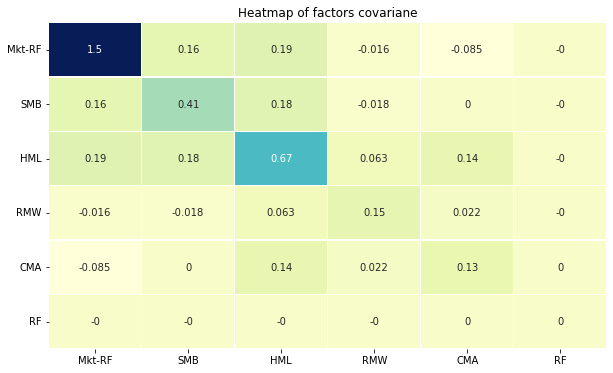

In [46]:
plt.figure(figsize = [10, 6])
# Visualize the covariance matrix using a heatmap
sns.heatmap(round(factors_cov,3),annot=True, linewidths=.5, cmap="YlGnBu", cbar=False)
plt.yticks(rotation=0, fontsize="10", va="center")
plt.title('Heatmap of factors covariane');


From the heatmap, there mostly positive low covariances. We notice zero or negative zero covariance of riskfree return with <br> other factors.

In [52]:
# calculate the variance
pd.DataFrame(factors5.var().reset_index().values,columns=["Factors", "Variance"])

,Factors,Variance
0,Mkt-RF,1.49145
1,SMB,0.40551
2,HML,0.6686
3,RMW,0.151251
4,CMA,0.132428
5,RF,1.13173e-05


In [53]:
# compute the correlation matrix
factors5.corr()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,1.000000,0.207491,0.192757,-0.034018,-0.191941,-0.035188
SMB,0.207491,1.000000,0.355844,-0.070827,0.001912,-0.041452
HML,0.192757,0.355844,1.000000,0.198528,0.470286,-0.021627
RMW,-0.034018,-0.070827,0.198528,1.000000,0.157096,-0.019564
CMA,-0.191941,0.001912,0.470286,0.157096,1.000000,0.001654
RF,-0.035188,-0.041452,-0.021627,-0.019564,0.001654,1.000000


## Next, consider the ACF and PACF of the process.

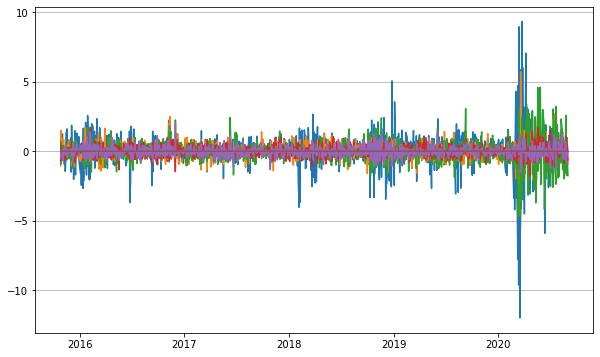

In [88]:
# plot the factors together
plt.figure(figsize = [10, 6])
plt.plot(factors5)
plt.grid(axis='y');

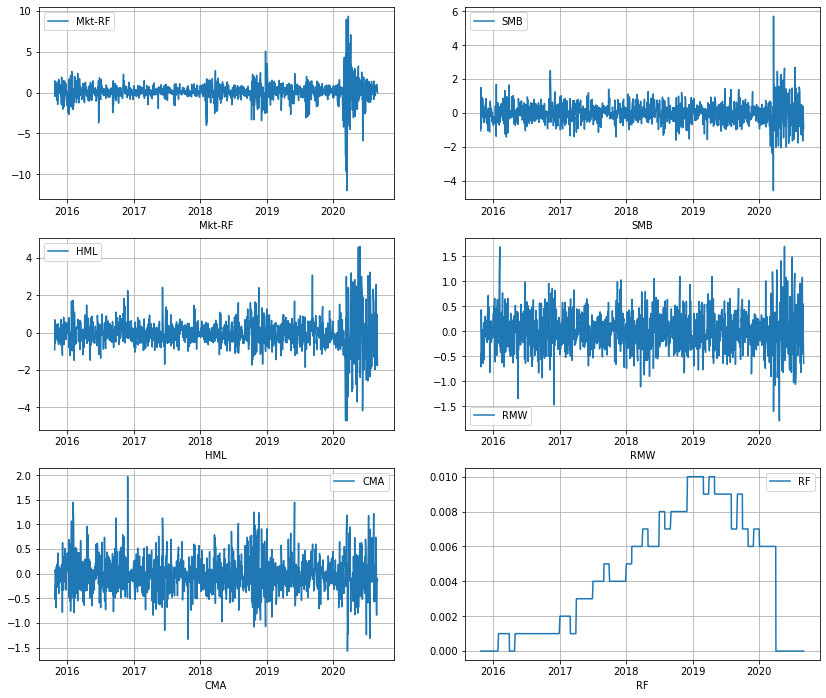

In [113]:
# plot the factors
factor_labels = factors5.columns.tolist()
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (14,12))
for idx, ax in enumerate(ax.flatten(),start=0):
    ax.plot(factors5.iloc[:,idx], label=factor_labels[idx])
    ax.set_xlabel(factor_labels[idx])
    ax.grid()
    ax.legend()


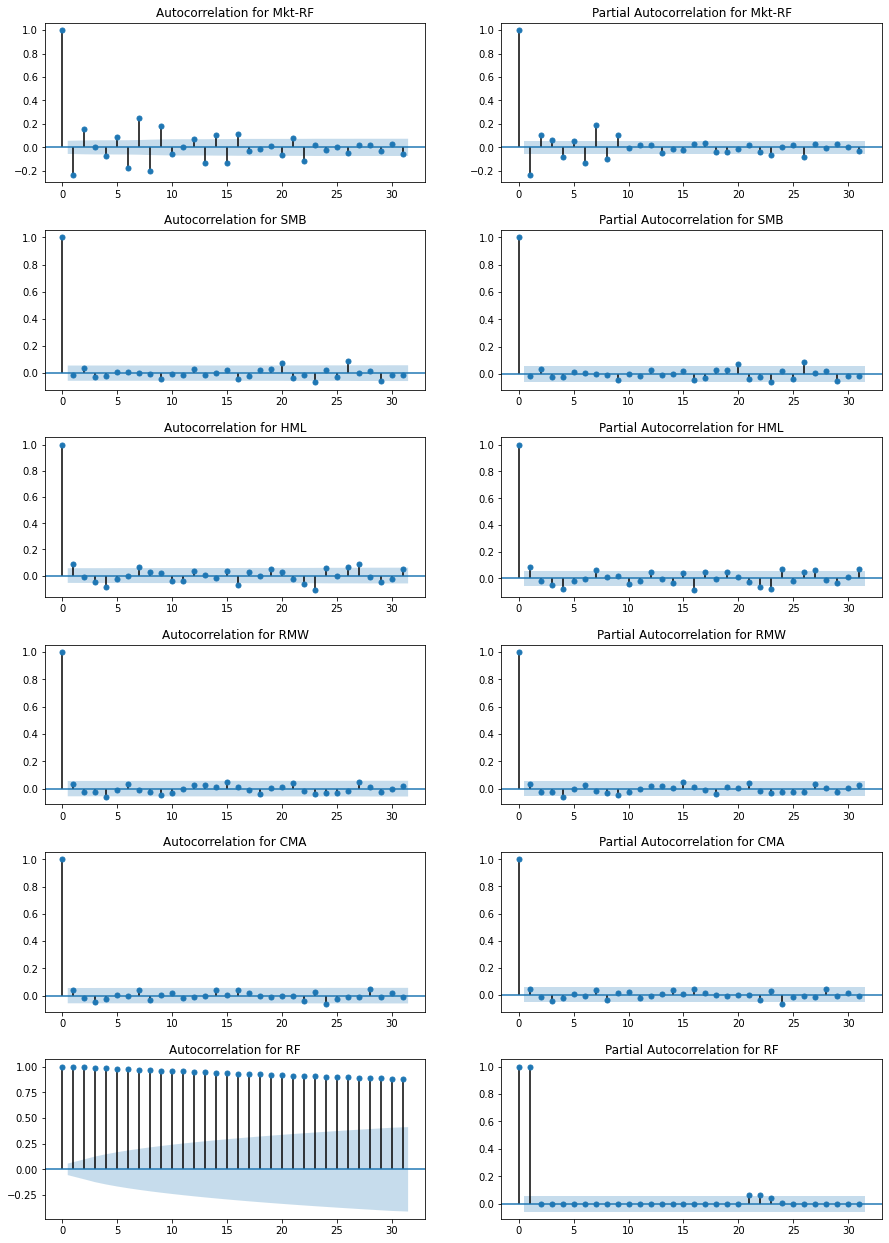

In [167]:
# plot the acf and pacf for the process
fig, ax = plt.subplots(nrows=6, ncols=2, figsize = (15,22))
p = ax.flatten().tolist()
for indx, colname in enumerate(factors5.columns):
    ba =  indx*2
    plot_acf(factors5.iloc[:,indx], title = f'Autocorrelation for {colname}', ax=p[ba])
    plot_pacf(factors5.iloc[:, indx], title = f'Partial Autocorrelation for {colname}', ax=p[ba+1])
    fig.subplots_adjust(hspace=.3)

## Next, consider the ACF and PACF of the process square.

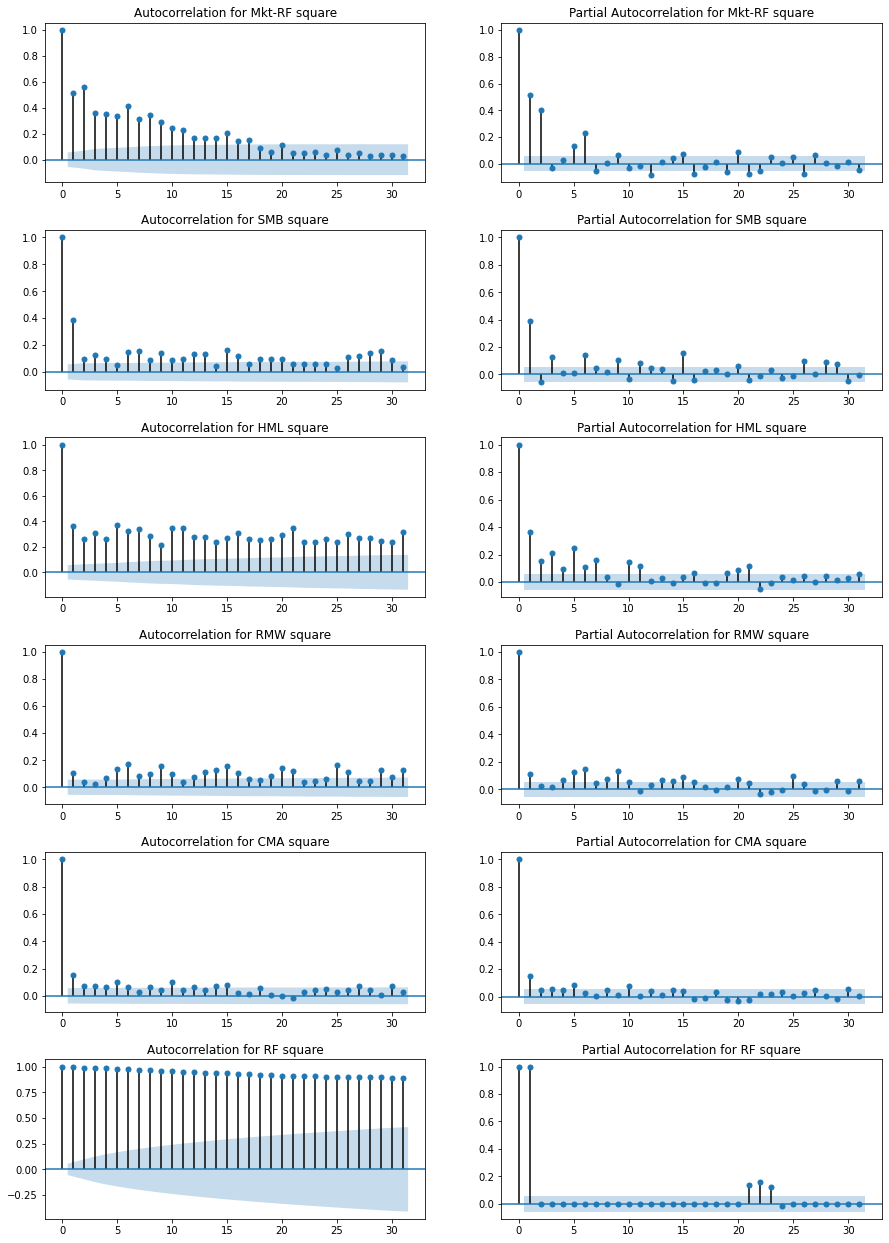

In [169]:
# plot the acf and pacf for the process square
factor5_sq = factors5**2
fig, ax = plt.subplots(nrows=6, ncols=2, figsize = (15,22))
p = ax.flatten().tolist()
for indx, colname in enumerate(factors5.columns):
    ba =  indx*2
    plot_acf(factor5_sq.iloc[:,indx], title = f'Autocorrelation for {colname} square', ax=p[ba])
    plot_pacf(factor5_sq.iloc[:, indx], title = f'Partial Autocorrelation for {colname} square', ax=p[ba+1])
    fig.subplots_adjust(hspace=.3)

## 2.Using PCA provide a 2-dimensional representation of the weight-space <br> of a set of linear models representing the covariance between our factors <br>and the different benchmark portfolios. Comment on the distribution of the <br> benchmark portfolios across the weight-space.

In [184]:
def pca_function(dataframe, transformer=StandardScaler()):
    
    portfolios_standard_ = transformer.fit_transform(dataframe)
    portfolios_standard = pd.DataFrame(portfolios_standard_, columns=dataframe.columns, index=dataframe.index)

    n = 2
    
    equities_ = dataframe.columns
    n_tickers = len(equities_)

    pca = None
    cov_matrix = pd.DataFrame(data=np.ones(shape=(n_tickers, n_tickers)), columns=equities_)
    
    cov_matrix = portfolios_standard.cov()
    pca = PCA()
    pca.fit(cov_matrix) 
    
    return portfolios_standard, pca.explained_variance_ratio_  


def explain_com(pca_explained_variance_ratio):
    # cumulative variance explained
    var_threshold_list = [0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.99, 0.9999]

    for xx in var_threshold_list:
        var_explained = np.cumsum(pca_explained_variance_ratio)
        num_comp = np.where(np.logical_not(var_explained < xx))[0][0] + 1  # +1 due to zero based-arrays
        print(f'{num_comp} components explain {round(100* xx,2)}% of variance')
        
def pca_plot(dataframe, variance_e):

    bar_width = 0.9
    n_asset = int((1 / 10) * dataframe.shape[1])
    
    if n_asset > len(dataframe.columns):
        n_asset = len(dataframe.columns)
        
    elif n_asset <= 0:
        n_asset = len(dataframe.columns) 
             
    x_indx = np.arange(n_asset)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 5)
    
    # Eigenvalues are measured as percentage of explained variance.
    rects = ax.bar(x_indx, variance_e[:n_asset], bar_width, color='deepskyblue')
    ax.set_xticks(x_indx)
    ax.set_xticklabels(list(range(1,n_asset+1)), rotation=45)
    ax.set_title('Percent variance explained')
    ax.legend((rects[0],), ('Percent variance explained by principal components',))

In [185]:
std2, pca22 = pca_function(factors5)

In [186]:
explain_com(pca22)

3 components explain 80.0% of variance
3 components explain 85.0% of variance
4 components explain 90.0% of variance
4 components explain 95.0% of variance
5 components explain 96.0% of variance
5 components explain 97.0% of variance
5 components explain 99.0% of variance
5 components explain 99.99% of variance


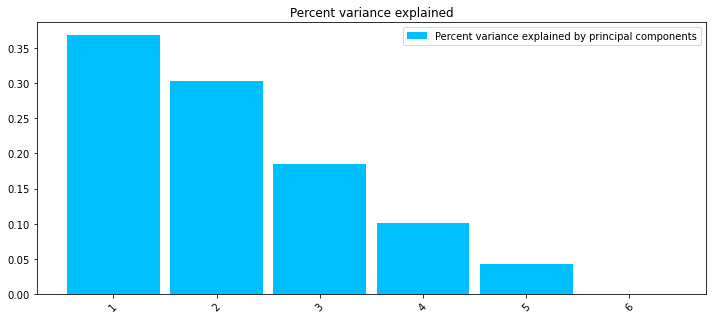

In [187]:
pca_plot(std2, pca22)

In [196]:
std2, pca22 = pca_function(portfolios100)

In [197]:
explain_com(pca22)

3 components explain 80.0% of variance
3 components explain 85.0% of variance
3 components explain 90.0% of variance
5 components explain 95.0% of variance
7 components explain 96.0% of variance
10 components explain 97.0% of variance
30 components explain 99.0% of variance
95 components explain 99.99% of variance


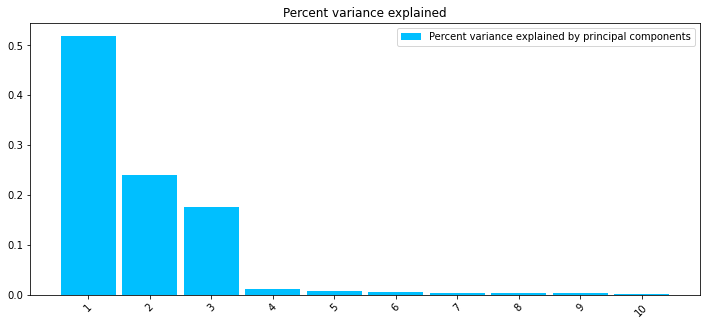

In [199]:
pca_plot(std2, pca22)

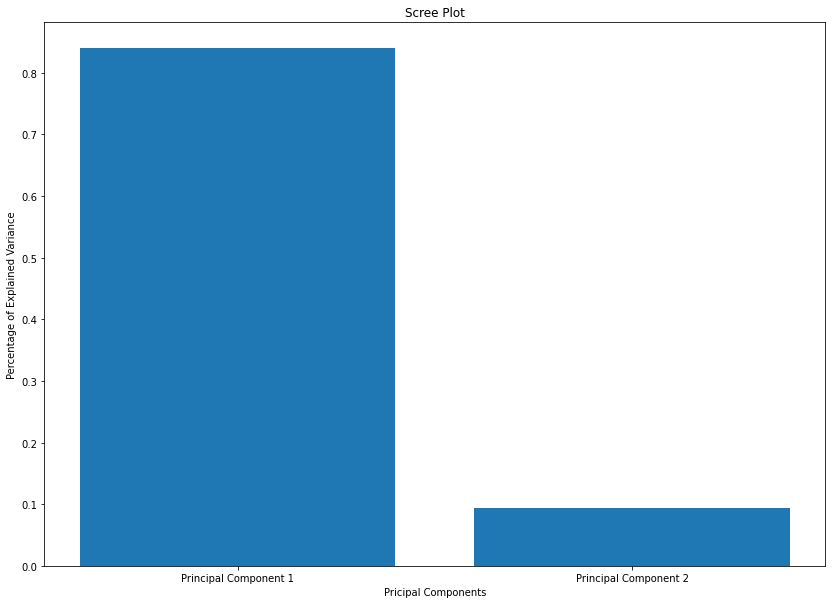

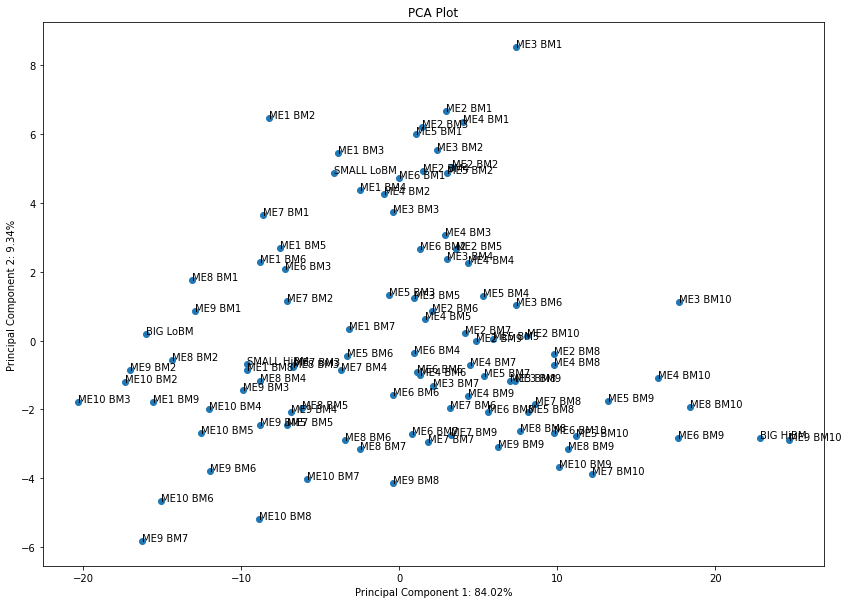

In [273]:
colname = portfolios100.columns
n = 2

# Using Pipeline
pipe3 = Pipeline([('scaler', StandardScaler()),
            ('pca', PCA(n_components=n))])

# Fit it to the dataset and extract the component vectors
pcomp_pro = pipe3.fit_transform(portfolios100.cov())
pcompfactors= pipe3.fit(portfolios100.cov())
# pcomp_pro = pipe3.fit_transform(portfolios100)
# pcompfactors= pipe3.fit(portfolios100)

plt.figure(figsize = [14, 10])
# plt.xticks(rotation=45)    
per_var = np.round(pipe3.steps[1][1].explained_variance_ratio_, 4)
labels = [f"Principal Component {i}" for i in range(1,len(per_var)+1)]
plt.bar(labels,per_var)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Pricipal Components")
plt.title("Scree Plot")
plt.show()


plt.figure(figsize = [14, 10])
pca_df = pd.DataFrame(pcomp_pro, index=colname, 
                      columns=labels)
# pca_df = pd.DataFrame(pcomp_pro, 
#                       columns=labels)
colname2 = pca_df.columns.tolist()
plt.scatter(pca_df[colname2[0]], pca_df[colname2[1]])

for sample in pca_df.index:
    plt.annotate(sample, (pca_df[colname2[0]].loc[sample], 
                          pca_df[colname2[1]].loc[sample]))
       
plt.ylabel(f"Principal Component 2: {per_var[1]*100}%")
plt.xlabel(f"Principal Component 1: {per_var[0]*100}%")
plt.title("PCA Plot")
plt.show()


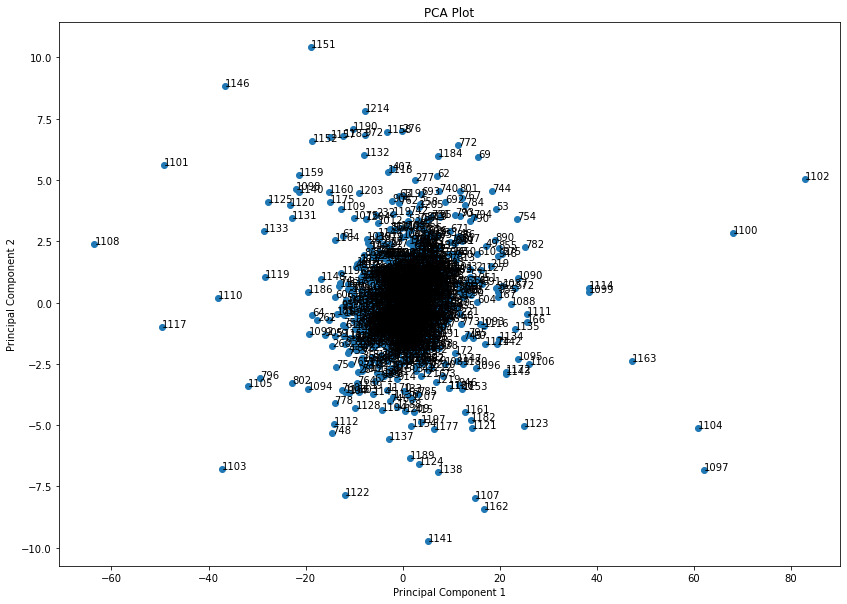

In [400]:
colname = portfolios100.columns
n = 2

# Using Pipeline
pipe3 = Pipeline([('scaler', StandardScaler()),
            ('pca', PCA(n_components=n))])

# Fit it to the dataset and extract the component vectors
# pcomp_pro = pipe3.fit_transform(portfolios100.cov())
# pcompfactors= pipe3.fit(portfolios100.cov())
pcomp_pro = pipe3.fit_transform(portfolios100)
pcompfactors= pipe3.fit(portfolios100)

# plt.figure(figsize = [14, 10])
# # plt.xticks(rotation=45)    
# per_var = np.round(pipe3.steps[1][1].explained_variance_ratio_, 4)
# labels = [f"Principal Component {i}" for i in range(1,len(per_var)+1)]
# plt.bar(labels,per_var)
# plt.ylabel("Percentage of Explained Variance")
# plt.xlabel("Pricipal Components")
# plt.title("Scree Plot")
# plt.show()


plt.figure(figsize = [14, 10])
# pca_df = pd.DataFrame(pcomp_pro, index=colname, 
#                       columns=labels)
pca_df = pd.DataFrame(pcomp_pro, 
                      columns=labels)
colname2 = pca_df.columns.tolist()
plt.scatter(pca_df[colname2[0]], pca_df[colname2[1]])

for sample in pca_df.index:
    plt.annotate(sample, (pca_df[colname2[0]].loc[sample], 
                          pca_df[colname2[1]].loc[sample]))
       
plt.ylabel(f"Principal Component 2")
plt.xlabel(f"Principal Component 1")
plt.title("PCA Plot")
plt.show()

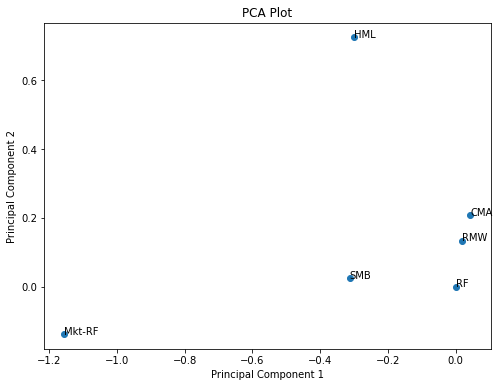

In [272]:

# Using Pipeline
lreg = Pipeline([('scaler', StandardScaler()),
            ('lnReg', linear_model.LinearRegression())])

# Fit it to the dataset and extract the component vectors
pcomp_pro = lreg.fit(pca_df, factors5)   
per_var = np.round(lreg.steps[1][1].coef_, 4)
labels = [f"Pc_reg {i}" for i in range(1,len(per_var)+1)]

colname = factors5.columns.tolist()
reg_df = pd.DataFrame(per_var, index=colname,
                      columns=["x", "y"])

colname2 = reg_df.columns.tolist()

plt.figure(figsize = [8, 6])
plt.scatter(reg_df[colname2[0]], reg_df[colname2[1]])

for sample in reg_df.index:
    plt.annotate(sample, (reg_df.x.loc[sample], 
                          reg_df.y.loc[sample]))
       
plt.ylabel(f"Principal Component 2")
plt.xlabel(f"Principal Component 1")
plt.title("Distribution of factors across the weight space")
plt.show()


# 3.Using linear regression test for the significance of these factors, <br> as per the original work of Fama and French.

In [311]:
import statsmodels.api as sm

factors6, _ = pca_function(factors5)
portfolio2, _ = pca_function(portfolios100)

# factors6 = sm.add_constant(factors6, prepend=False)

# Fit and summarize OLS model
model = sm.OLS(portfolio2.iloc[:,0], factors6)

result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:             SMALL LoBM   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              541.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):                        0.00
Time:                        05:07:41   Log-Likelihood:                         -936.79
No. Observations:                1220   AIC:                                      1886.
Df Residuals:                    1214   BIC:                                      1916.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [347]:
n_portfolios = len(portfolios100.columns)
rfree = np.array([0.] * n_portfolios)
beta1 = np.array([0.] * n_portfolios)
beta2 = np.array([0.] * n_portfolios)
beta3 = np.array([0.] * n_portfolios)
beta4 = np.array([0.] * n_portfolios)
beta5 = np.array([0.] * n_portfolios)

In [353]:
for i in range(portfolios100.shape[1]):
    model = sm.OLS(portfolio2.iloc[:,i], factors6)
    r_ = model.fit()
    pval = round(r_.pvalues, 3)
    beta1[i], beta2[i], beta3[i] , beta4[i], beta5[i], rfree[i] = pval.T.values
 
    

In [393]:
data = pd.DataFrame(data={'RF':rfree, 'Mkt-RF':beta1, 'SMB':beta2, 'HML':beta3, 'RMW':beta4, 'CMA':beta5},
                   index = portfolios100.columns) #.reset_index().rename(columns={"index":"Porfolios"})


In [394]:
data.head()

,RF,Mkt-RF,SMB,HML,RMW,CMA
SMALL LoBM,0.429,0.0,0.0,0.000,0.0,0.807
ME1 BM2,0.853,0.0,0.0,0.000,0.0,0.367
ME1 BM3,0.157,0.0,0.0,0.000,0.0,0.599
ME1 BM4,0.588,0.0,0.0,0.000,0.0,0.557
ME1 BM5,0.355,0.0,0.0,0.067,0.0,0.480


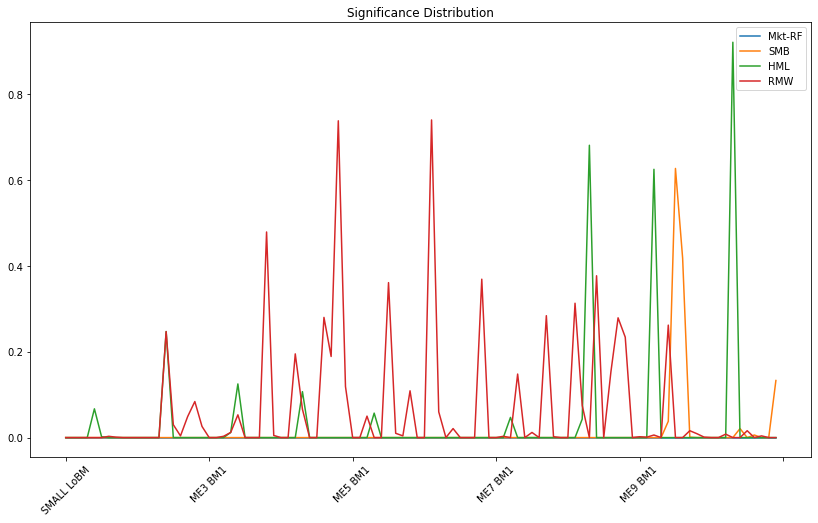

In [398]:

data.iloc[:,1:5].plot(figsize=(14,8))
plt.xticks(rotation=45)
plt.title("Significance Distribution");

Clearly only Mkt-RF, SMB, HML and RWL are statistically significant.